In [1]:
import numpy as np
import matplotlib.pyplot as plt
from model import BarotropicModel

In [22]:
Nx = 512
Ny = 256
Lx = 20000*1e3
Ly = 10000*1e3

x = np.linspace(-Lx/2,Lx/2,Nx)
y = np.linspace(-Ly/2,Ly/2,Ny)
xx, yy = np.meshgrid(x, y)

vor_init = np.zeros_like(xx)
forcing_struct = 1e-11*np.exp(-(xx**2+yy**2)/10**10)
dt = 150
total_t = 86400*200

omega = 2*np.pi/200/86400
# omega = 0
beta = 2e-11

In [5]:
myModel = BarotropicModel(vor_init, forcing_struct,
                          omega, beta,
                          Nx, Ny, Lx, Ly,
                          dt, total_t)

In [6]:
myModel.run()

Step 57600 / 57600 ...     
[Done]


In [9]:
k = np.fft.fftfreq(Nx, d=Lx/(2*np.pi)/Nx)
l = np.fft.fftfreq(Ny, d=Ly/(2*np.pi)/Ny)
psi_sp = np.fft.fftn(myModel.psi[-1], axes = (0,1))

In [10]:
coord_x = k[int(Nx/2):]
coord_y = np.fft.fftshift(l[:])
coord_z = psi_sp[:,int(Nx/2):]
coord_z = np.fft.fftshift(coord_z, axes = 0)
coord_z = np.log(np.abs(coord_z))
coord_z = coord_z

Text(0.5, 1.0, 'Power spectrum at t=')

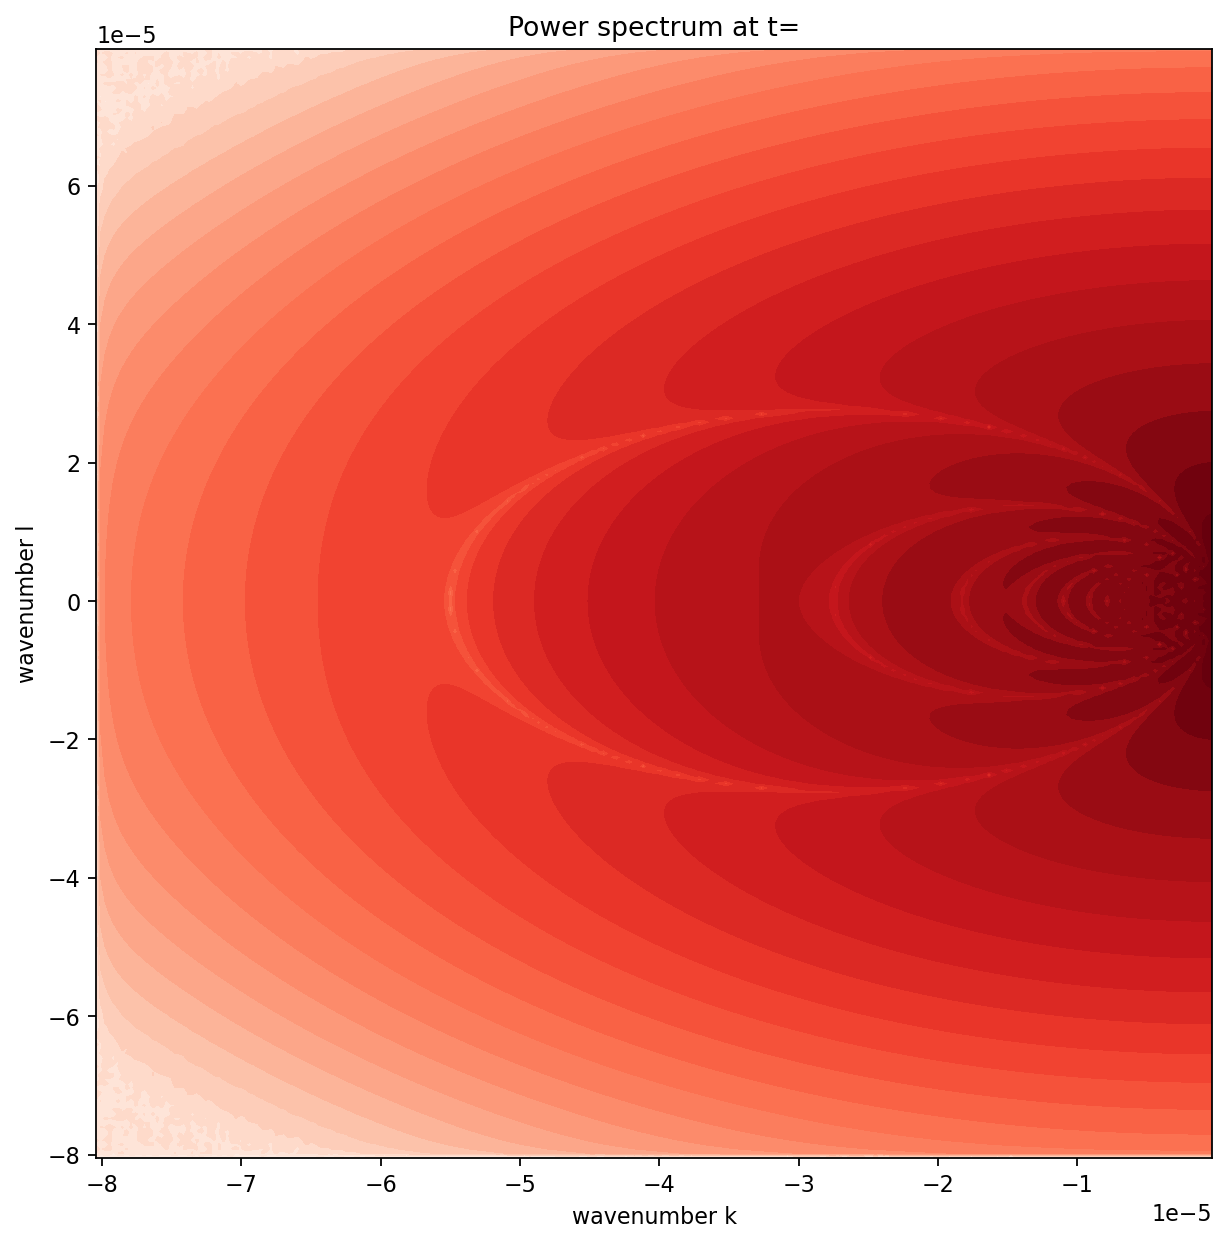

In [13]:
fig, ax = plt.subplots(figsize = (9,9), dpi = 160)
coutourf_levels = 32
ax.contourf(coord_x,
            coord_y,
            coord_z, 
            levels = coutourf_levels,
            extend = "both",
            cmap = "Reds")
#ax.scatter([-beta/(2*omega)],[0], c = "k", s = 20)

#circle1 = plt.Circle((-beta/2/omega, 0), beta/2/omega, fill = False)
#ax.add_patch(circle1)
#plt.xticks(np.linspace(-4e-5,0,9))
#plt.yticks(np.linspace(-2e-5,2e-5,9))
plt.xlabel("wavenumber k")
plt.ylabel("wavenumber l")
#plt.xlim(1.2*-beta/omega, k[-1])
#plt.ylim(1.2*-beta/2/omega, 1.2*beta/2/omega)
plt.title(f"Power spectrum at t=")

In [ ]:
forcing_sp = np.fft.fftn(forcing_struct, axes = (0,1))
coord_x = k[int(Nx/2):]
coord_y = np.fft.fftshift(l[:])
coord_z = forcing_sp[:,int(Nx/2):]
coord_z = np.fft.fftshift(coord_z, axes = 0)
coord_z = np.log(np.abs(coord_z))
coord_z = coord_z
fig, ax = plt.subplots(figsize = (9,9), dpi = 160)
coutourf_levels = 32
ax.contourf(coord_x,
            coord_y,
            coord_z, 
            levels = coutourf_levels,
            extend = "both",
            cmap = "Reds")